## <i> <span style='color:red'>KNN-ZOO DATA</i></span>
### PROBLEM STATMENT:Implement a KNN model to classify the animals into categories

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
df_zoo=pd.read_csv("zoo.csv")
df_zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Understanding the basic info from the train data and test data
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Dropping unwanted columns
df_zoo.drop(['animal name'],axis=1,inplace=True)

<Axes: ylabel='Count'>

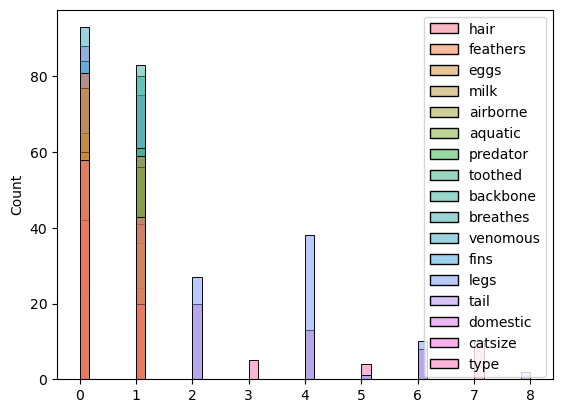

In [5]:
#  visualization of the dataset
sns.histplot(df_zoo)

In [6]:
# Splitting the dataset into dependent and independent variables
x=df_zoo.iloc[:,:16].values
y=df_zoo.iloc[:,16].values

In [7]:
# Splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [8]:
# KNN model, with 6 neighbors
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [9]:
# Predicting the model on the test data
y_pred=model.predict(x_test)

In [10]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8571428571428571

In [11]:
# Using gridsearchCV to identify the best parameter, which gives a higher accuracy in classification
kvalues=np.array(range(1,50))

In [12]:
parameters=dict(n_neighbors=kvalues)

In [13]:
model2=KNeighborsClassifier()
grid=GridSearchCV(estimator=model2,param_grid=parameters)

In [14]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [15]:
print((grid.best_params_),(grid.best_score_))

{'n_neighbors': 1} 0.97


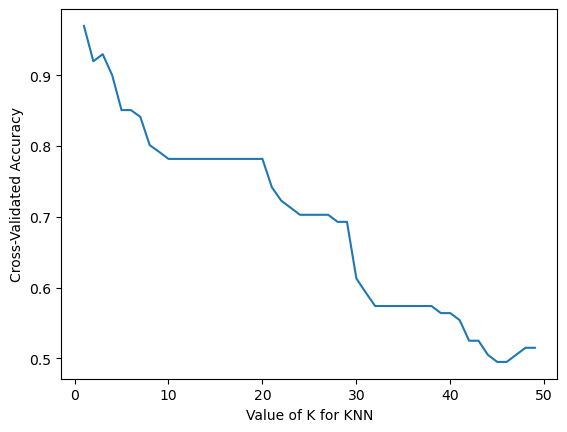

In [16]:
# Visualization 
k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Inference:
### From the KNN model classification ,we understood that with the less no. of  neighbours will give the maximum accuracy in classification